https://www.kaggle.com/swaroopkml/cifar10-pngs-in-folders

## Import libraries

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import torch
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

## Path

In [2]:
train_path = r'C:\Users\RezaHardMan\Documents\Python projects\datasets\cifar10\train'
valid_path = r'C:\Users\RezaHardMan\Documents\Python projects\datasets\cifar10\valid'
test_path = r'C:\Users\RezaHardMan\Documents\Python projects\datasets\cifar10\test'

## data augmentatiom

In [3]:
# list1 = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
# i = 0
# os.chdir('C:/Users/RezaHardMan/Documents/Python projects/datasets/cifar10/')
# gen = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, height_shift_range=0.1, shear_range=0.15, zoom_range=0.1, 
#     channel_shift_range=10., horizontal_flip=True)

# while(i<len(list1)):
#     image_path = glob.glob(f'new/{list1[i]}/*.png')
#     for j in range(len(image_path)-1):    
#         image = np.expand_dims(plt.imread(image_path[j]),0)
#         aug_iter = gen.flow(image, save_to_dir=f'new/{list1[i]}', save_prefix='aug-image-', save_format='png')
#         aug_images = [next(aug_iter)[0].astype(np.uint8) for k in range(10)]
#     i = i +1 

## Organize data into train, valid, test dirs

In [4]:
# list1 = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
# i = 0
# os.chdir('C:/Users/RezaHardMan/Documents/Python projects/datasets/cifar10/')
# while(i<len(list1)):
    
#     if os.path.isdir('valid/'+list1[i]) is False:
        
#         os.makedirs('valid/'+list1[i]) 
#         for j in random.sample(glob.glob('train/'+list1[i]), 1000):
#             shutil.move(i, 'valid/'+i)        
#     i = i+1
# os.chdir('../../')
# i=0
# while(i<len(list1)):
#     os.chdir('C:/Users/RezaHardMan/Documents/Python projects/datasets/cifar10/')
#     for j in random.sample(glob.glob(f'train/{list1[i]}/*.png'), 1000):
#         shutil.move(j, 'valid/'+list1[i])        
#     i = i+1
#     os.chdir('../../')

## Generating images

In [5]:
train_batches = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, height_shift_range=0.1, shear_range=0.15, zoom_range=0.1, 
    channel_shift_range=10., horizontal_flip=True, preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(32,32), classes=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'], batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=valid_path, target_size=(32,32), classes=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'], batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(32,32), classes=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'], batch_size=10, shuffle=False)

Found 40000 images belonging to 10 classes.
Found 10000 images belonging to 10 classes.
Found 10000 images belonging to 10 classes.


## Visualising a batch of images

In [6]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

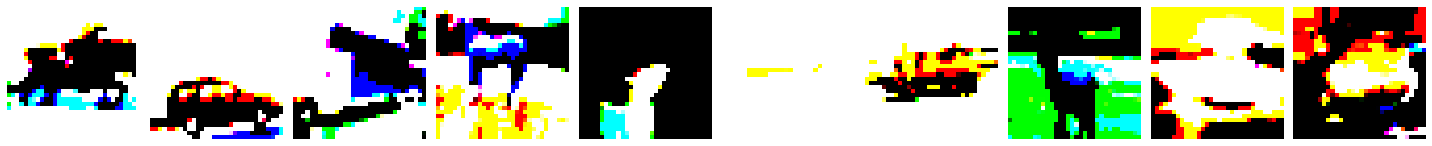

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


In [7]:
imgs, labels = next(train_batches)
plotImages(imgs)
print(labels)

## Defining Model

In [8]:
model = Sequential([
    Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding = 'same', input_shape=(32,32,3)),
    Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding = 'same'),
    BatchNormalization(),
    MaxPool2D(pool_size=(2, 2), strides=2),
    
    
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = 'same'),
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = 'same'),
    BatchNormalization(),
    MaxPool2D(pool_size=(2, 2), strides=2),    
    Dropout(0.2),
    
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'),
    BatchNormalization(),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Dropout(0.2),
    
    Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'same'),
    Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'same'),
    Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'same'),
    BatchNormalization(),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Dropout(0.2),
    
    Conv2D(filters=256, kernel_size=(3, 3), activation='relu', padding = 'same'),
    Conv2D(filters=256, kernel_size=(3, 3), activation='relu', padding = 'same'),
    Conv2D(filters=256, kernel_size=(3, 3), activation='relu', padding = 'same'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Flatten(),
    Dense(512, activation = 'relu'),
    Dropout(0.5),

    Dense(units=10, activation='softmax')
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 16)        2320      
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 16)       64        
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 16)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 32)        4640      
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 32)        9

In [10]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
from keras.callbacks import Callback, ModelCheckpoint, ReduceLROnPlateau
filepath1="weights-improvement-{epoch:02d}-{val_accuracy:.2f}.hdf5"
filepath2 = "best_weights.hdf5"
checkpoint1 = ModelCheckpoint(filepath1, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
checkpoint2 = ModelCheckpoint(filepath2, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')


callbacks_list = [checkpoint1,checkpoint2]

## Training Data

In [13]:
history = model.fit(train_batches, validation_data = valid_batches, epochs = 150, verbose=1,callbacks=callbacks_list)

Epoch 1/150
3996/4000 [============================>.] - ETA: 0s - loss: 0.6273 - accuracy: 0.7864
Epoch 00001: val_accuracy improved from 0.80620 to 0.80660, saving model to weights-improvement-01-0.81.hdf5

Epoch 00001: val_accuracy improved from 0.80620 to 0.80660, saving model to best_weights.hdf5
4000/4000 [==============================] - 42s 11ms/step - loss: 0.6274 - accuracy: 0.7864 - val_loss: 0.5715 - val_accuracy: 0.8066
Epoch 2/150
3995/4000 [============================>.] - ETA: 0s - loss: 0.6190 - accuracy: 0.7874
Epoch 00002: val_accuracy did not improve from 0.80660

Epoch 00002: val_accuracy did not improve from 0.80660
4000/4000 [==============================] - 41s 10ms/step - loss: 0.6187 - accuracy: 0.7874 - val_loss: 0.5927 - val_accuracy: 0.7960
Epoch 3/150
3995/4000 [============================>.] - ETA: 0s - loss: 0.6107 - accuracy: 0.7900
Epoch 00003: val_accuracy did not improve from 0.80660

Epoch 00003: val_accuracy did not improve from 0.80660
4000/40

Epoch 23/150
3999/4000 [============================>.] - ETA: 0s - loss: 0.5087 - accuracy: 0.8259
Epoch 00023: val_accuracy did not improve from 0.82930

Epoch 00023: val_accuracy did not improve from 0.82930
4000/4000 [==============================] - 40s 10ms/step - loss: 0.5086 - accuracy: 0.8259 - val_loss: 0.5244 - val_accuracy: 0.8253
Epoch 24/150
3995/4000 [============================>.] - ETA: 0s - loss: 0.5092 - accuracy: 0.8258
Epoch 00024: val_accuracy did not improve from 0.82930

Epoch 00024: val_accuracy did not improve from 0.82930
4000/4000 [==============================] - 40s 10ms/step - loss: 0.5091 - accuracy: 0.8257 - val_loss: 0.5392 - val_accuracy: 0.8231
Epoch 25/150
3995/4000 [============================>.] - ETA: 0s - loss: 0.4992 - accuracy: 0.8278
Epoch 00025: val_accuracy improved from 0.82930 to 0.83430, saving model to weights-improvement-25-0.83.hdf5

Epoch 00025: val_accuracy improved from 0.82930 to 0.83430, saving model to best_weights.hdf5
4000

Epoch 46/150
3996/4000 [============================>.] - ETA: 0s - loss: 0.4431 - accuracy: 0.8467
Epoch 00046: val_accuracy did not improve from 0.84590

Epoch 00046: val_accuracy did not improve from 0.84590
4000/4000 [==============================] - 42s 10ms/step - loss: 0.4433 - accuracy: 0.8467 - val_loss: 0.4561 - val_accuracy: 0.8451
Epoch 47/150
3998/4000 [============================>.] - ETA: 0s - loss: 0.4436 - accuracy: 0.8489
Epoch 00047: val_accuracy did not improve from 0.84590

Epoch 00047: val_accuracy did not improve from 0.84590
4000/4000 [==============================] - 44s 11ms/step - loss: 0.4435 - accuracy: 0.8490 - val_loss: 0.4862 - val_accuracy: 0.8421
Epoch 48/150
3999/4000 [============================>.] - ETA: 0s - loss: 0.4379 - accuracy: 0.8513
Epoch 00048: val_accuracy did not improve from 0.84590

Epoch 00048: val_accuracy did not improve from 0.84590
4000/4000 [==============================] - 44s 11ms/step - loss: 0.4379 - accuracy: 0.8512 - va

Epoch 70/150
4000/4000 [==============================] - ETA: 0s - loss: 0.3943 - accuracy: 0.8636
Epoch 00070: val_accuracy did not improve from 0.85420

Epoch 00070: val_accuracy did not improve from 0.85420
4000/4000 [==============================] - 40s 10ms/step - loss: 0.3943 - accuracy: 0.8636 - val_loss: 0.4431 - val_accuracy: 0.8527
Epoch 71/150
3998/4000 [============================>.] - ETA: 0s - loss: 0.4005 - accuracy: 0.8649
Epoch 00071: val_accuracy did not improve from 0.85420

Epoch 00071: val_accuracy did not improve from 0.85420
4000/4000 [==============================] - 42s 11ms/step - loss: 0.4005 - accuracy: 0.8648 - val_loss: 0.4612 - val_accuracy: 0.8503
Epoch 72/150
4000/4000 [==============================] - ETA: 0s - loss: 0.3939 - accuracy: 0.8645
Epoch 00072: val_accuracy did not improve from 0.85420

Epoch 00072: val_accuracy did not improve from 0.85420
4000/4000 [==============================] - 41s 10ms/step - loss: 0.3939 - accuracy: 0.8645 - va

Epoch 93/150
3997/4000 [============================>.] - ETA: 0s - loss: 0.3620 - accuracy: 0.8767
Epoch 00093: val_accuracy improved from 0.86190 to 0.86540, saving model to weights-improvement-93-0.87.hdf5

Epoch 00093: val_accuracy improved from 0.86190 to 0.86540, saving model to best_weights.hdf5
4000/4000 [==============================] - 41s 10ms/step - loss: 0.3619 - accuracy: 0.8767 - val_loss: 0.4210 - val_accuracy: 0.8654
Epoch 94/150
3997/4000 [============================>.] - ETA: 0s - loss: 0.3698 - accuracy: 0.8728
Epoch 00094: val_accuracy did not improve from 0.86540

Epoch 00094: val_accuracy did not improve from 0.86540
4000/4000 [==============================] - 41s 10ms/step - loss: 0.3699 - accuracy: 0.8727 - val_loss: 0.4658 - val_accuracy: 0.8468
Epoch 95/150
3997/4000 [============================>.] - ETA: 0s - loss: 0.3604 - accuracy: 0.8745
Epoch 00095: val_accuracy did not improve from 0.86540

Epoch 00095: val_accuracy did not improve from 0.86540
4000

Epoch 117/150
3997/4000 [============================>.] - ETA: 0s - loss: 0.3415 - accuracy: 0.8831
Epoch 00117: val_accuracy improved from 0.86540 to 0.86760, saving model to weights-improvement-117-0.87.hdf5

Epoch 00117: val_accuracy improved from 0.86540 to 0.86760, saving model to best_weights.hdf5
4000/4000 [==============================] - 53s 13ms/step - loss: 0.3413 - accuracy: 0.8831 - val_loss: 0.4040 - val_accuracy: 0.8676
Epoch 118/150
3997/4000 [============================>.] - ETA: 0s - loss: 0.3400 - accuracy: 0.8827
Epoch 00118: val_accuracy improved from 0.86760 to 0.87040, saving model to weights-improvement-118-0.87.hdf5

Epoch 00118: val_accuracy improved from 0.86760 to 0.87040, saving model to best_weights.hdf5
4000/4000 [==============================] - 52s 13ms/step - loss: 0.3399 - accuracy: 0.8827 - val_loss: 0.4024 - val_accuracy: 0.8704
Epoch 119/150
3997/4000 [============================>.] - ETA: 0s - loss: 0.3519 - accuracy: 0.8810
Epoch 00119: val_

Epoch 140/150
3997/4000 [============================>.] - ETA: 0s - loss: 0.3231 - accuracy: 0.8901
Epoch 00140: val_accuracy did not improve from 0.87240

Epoch 00140: val_accuracy did not improve from 0.87240
4000/4000 [==============================] - 41s 10ms/step - loss: 0.3232 - accuracy: 0.8900 - val_loss: 0.4489 - val_accuracy: 0.8596
Epoch 141/150
3996/4000 [============================>.] - ETA: 0s - loss: 0.3223 - accuracy: 0.8906
Epoch 00141: val_accuracy did not improve from 0.87240

Epoch 00141: val_accuracy did not improve from 0.87240
4000/4000 [==============================] - 41s 10ms/step - loss: 0.3223 - accuracy: 0.8906 - val_loss: 0.4285 - val_accuracy: 0.8629
Epoch 142/150
4000/4000 [==============================] - ETA: 0s - loss: 0.3272 - accuracy: 0.8878
Epoch 00142: val_accuracy did not improve from 0.87240

Epoch 00142: val_accuracy did not improve from 0.87240
4000/4000 [==============================] - 40s 10ms/step - loss: 0.3272 - accuracy: 0.8878 -

## Testing model on our Test images

In [16]:
predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=0)

In [14]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[899  17  15   7   9   0   4  10  22  17]
 [  4 954   2   1   2   1   2   1   4  29]
 [ 37   1 817  15  33  10  53  21   5   8]
 [ 20   7  52 649  63  51  92  41  13  12]
 [ 12   2  32  10 872   2  41  27   2   0]
 [  9   4  38 120  37 686  45  52   3   6]
 [  5   1  17  10   5   1 951   6   2   2]
 [ 13   1  11  14  31   4   5 913   3   5]
 [ 49  19   3   2   3   0   3   2 896  23]
 [ 10  35   4   3   0   0   4   2   7 935]]


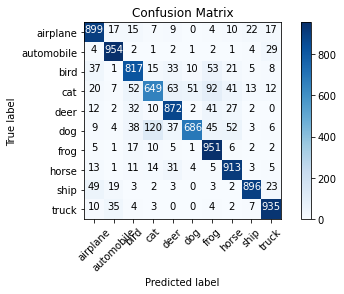

In [18]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))
cm_plot_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')